In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [37]:
df = pd.read_csv("Boston.csv")
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


array([[<AxesSubplot:title={'center':'crim'}>,
        <AxesSubplot:title={'center':'zn'}>,
        <AxesSubplot:title={'center':'indus'}>,
        <AxesSubplot:title={'center':'chas'}>],
       [<AxesSubplot:title={'center':'nox'}>,
        <AxesSubplot:title={'center':'rm'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'dis'}>],
       [<AxesSubplot:title={'center':'rad'}>,
        <AxesSubplot:title={'center':'tax'}>,
        <AxesSubplot:title={'center':'ptratio'}>,
        <AxesSubplot:title={'center':'black'}>],
       [<AxesSubplot:title={'center':'lstat'}>,
        <AxesSubplot:title={'center':'medv'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

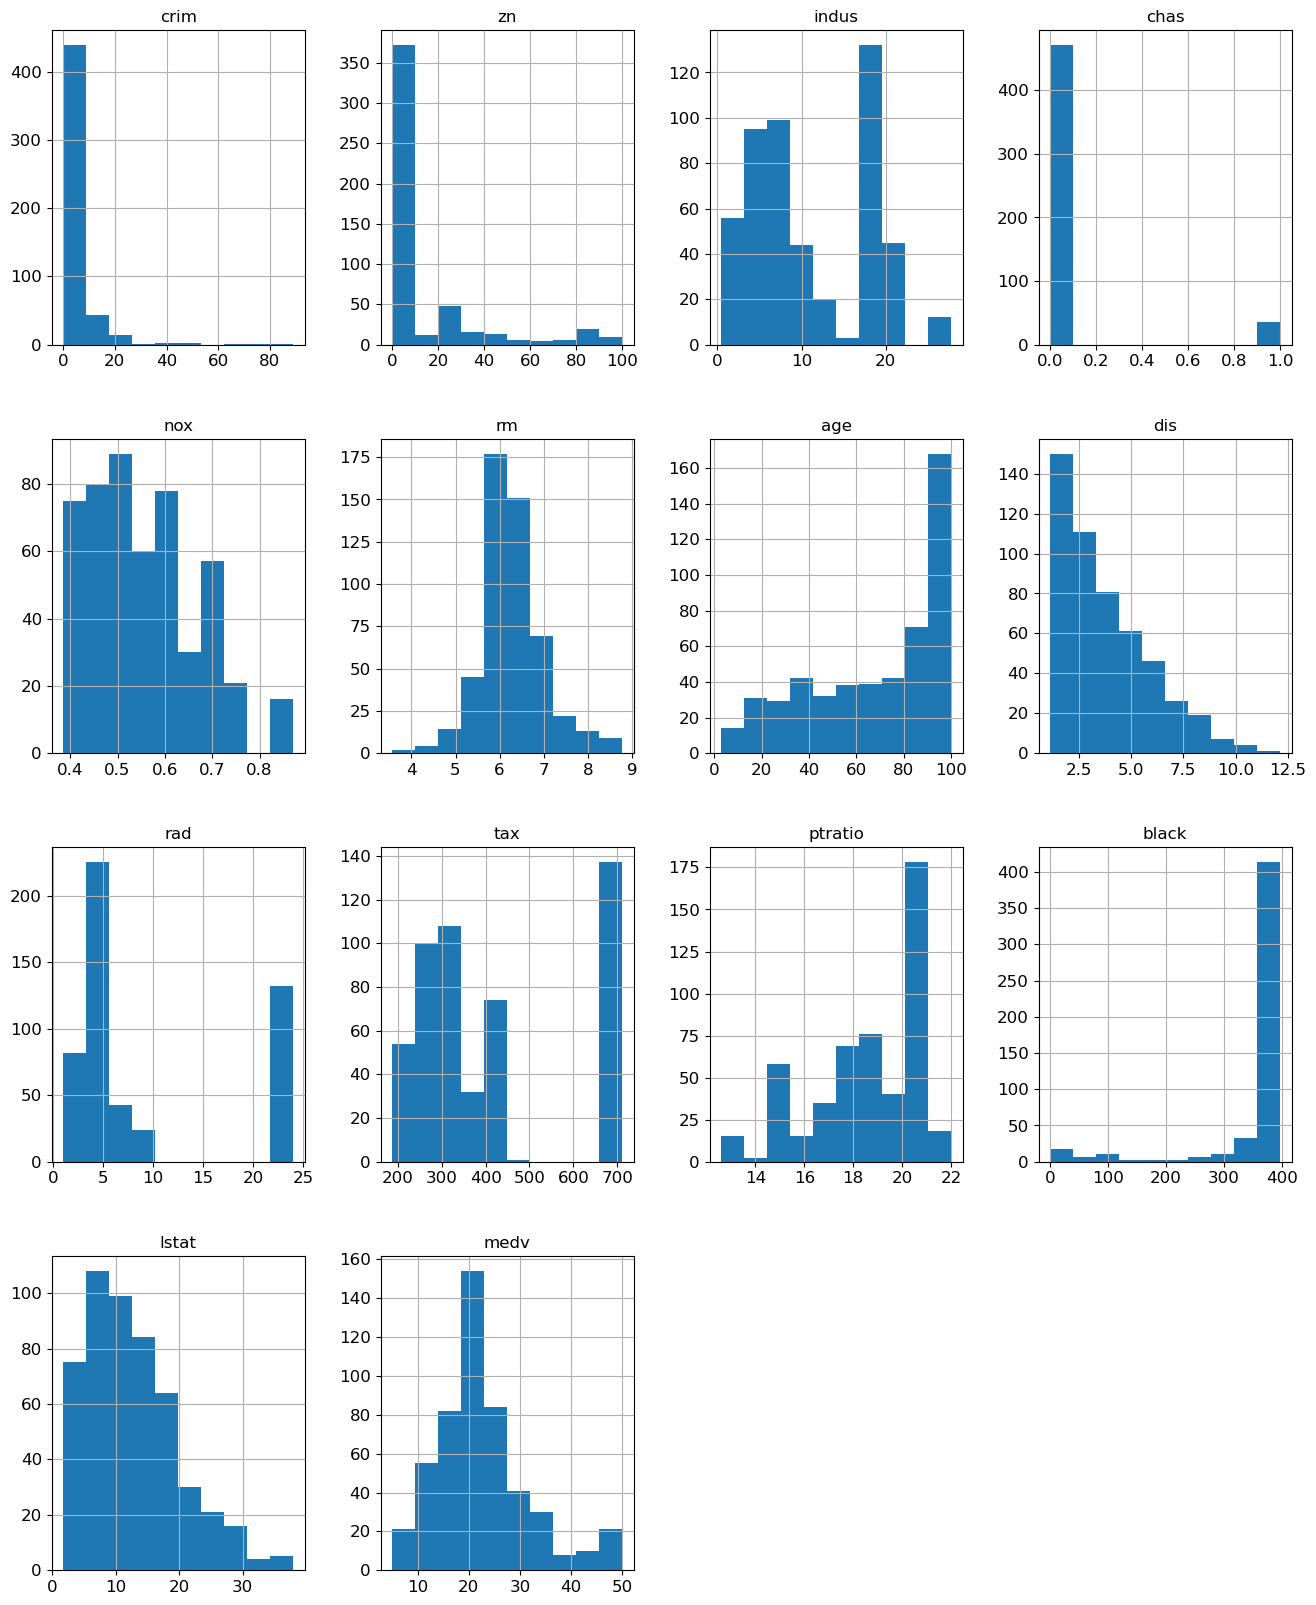

In [38]:
df = df.drop(['Unnamed: 0'], axis = 1)
df.hist(figsize=(16, 20), xlabelsize = 12, ylabelsize = 12)

<AxesSubplot:>

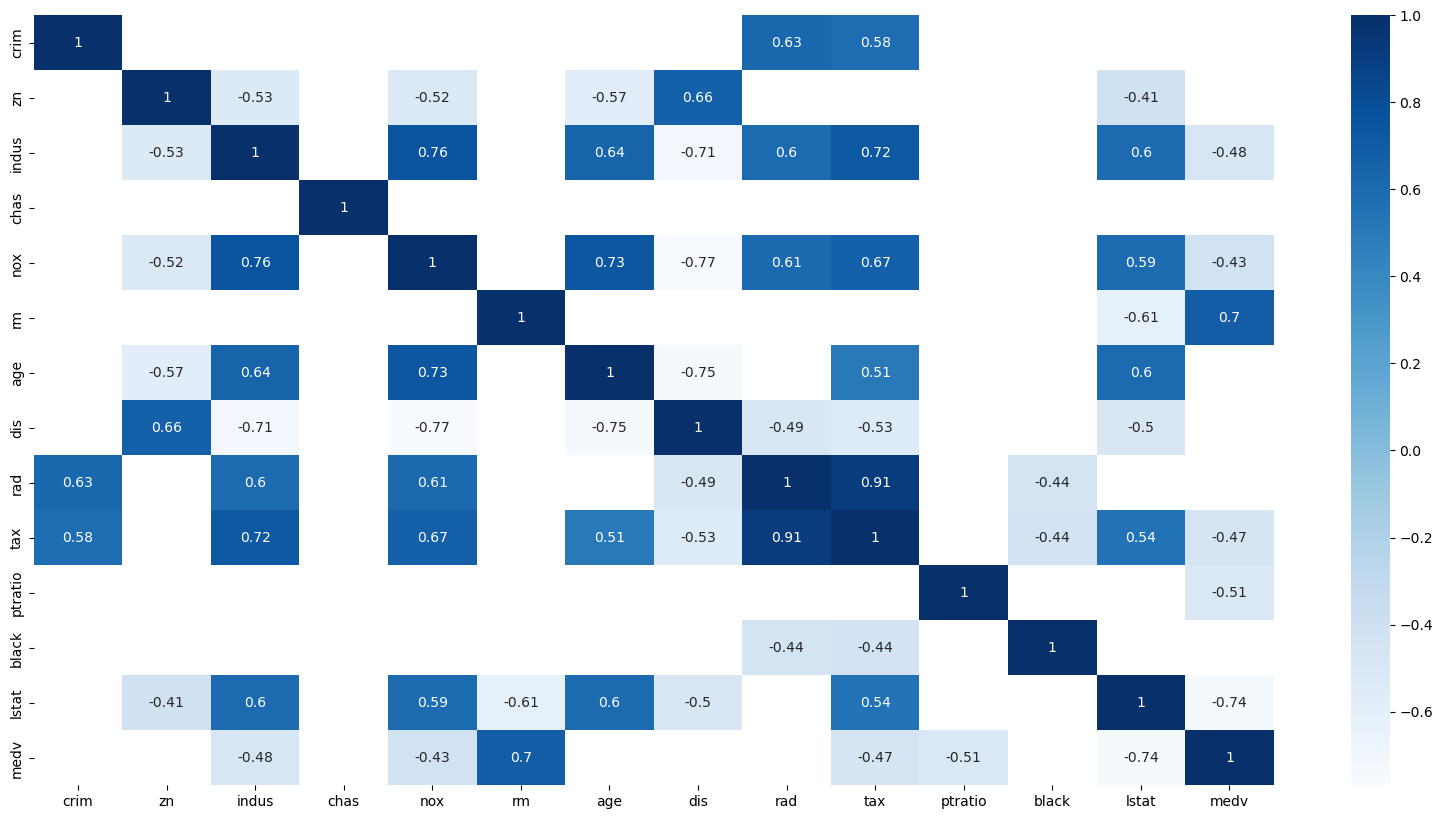

In [39]:
corr = df.corr()
plt.figure(figsize = (20, 10))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], annot=True, cmap='Blues')

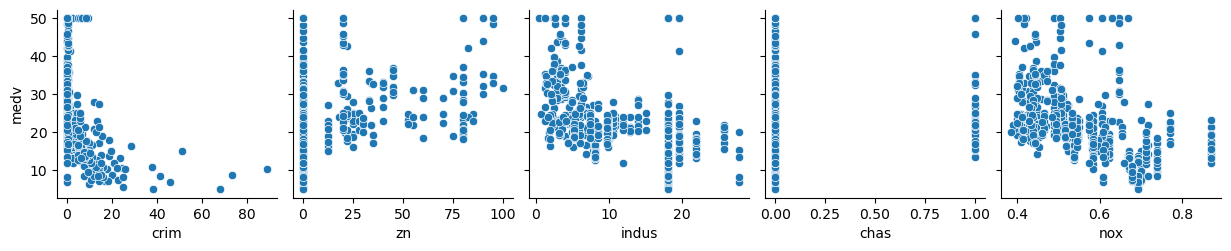

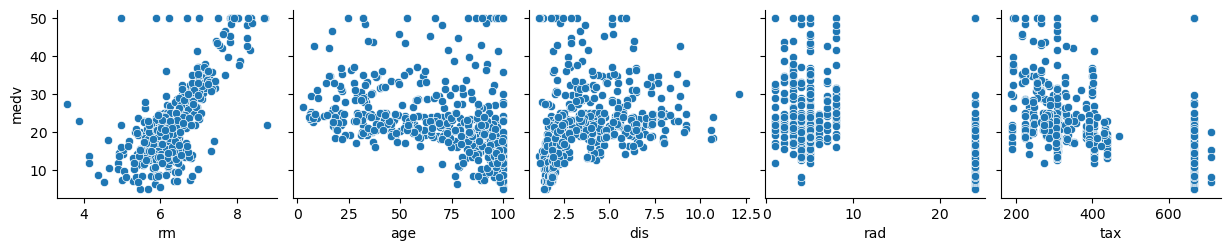

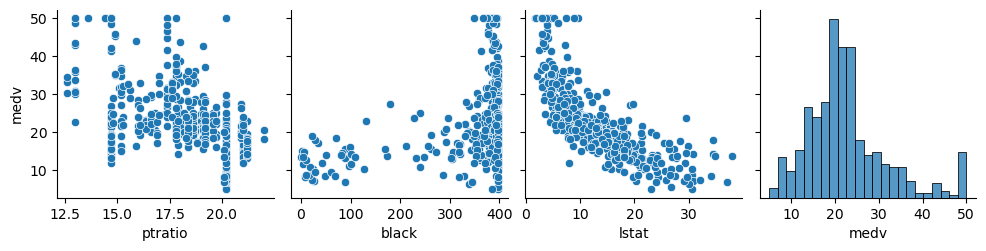

In [40]:
for i in range(0, len(df.columns), 5):
    sns.pairplot(data = df, x_vars = df.columns[i:i+5], y_vars = ['medv'])

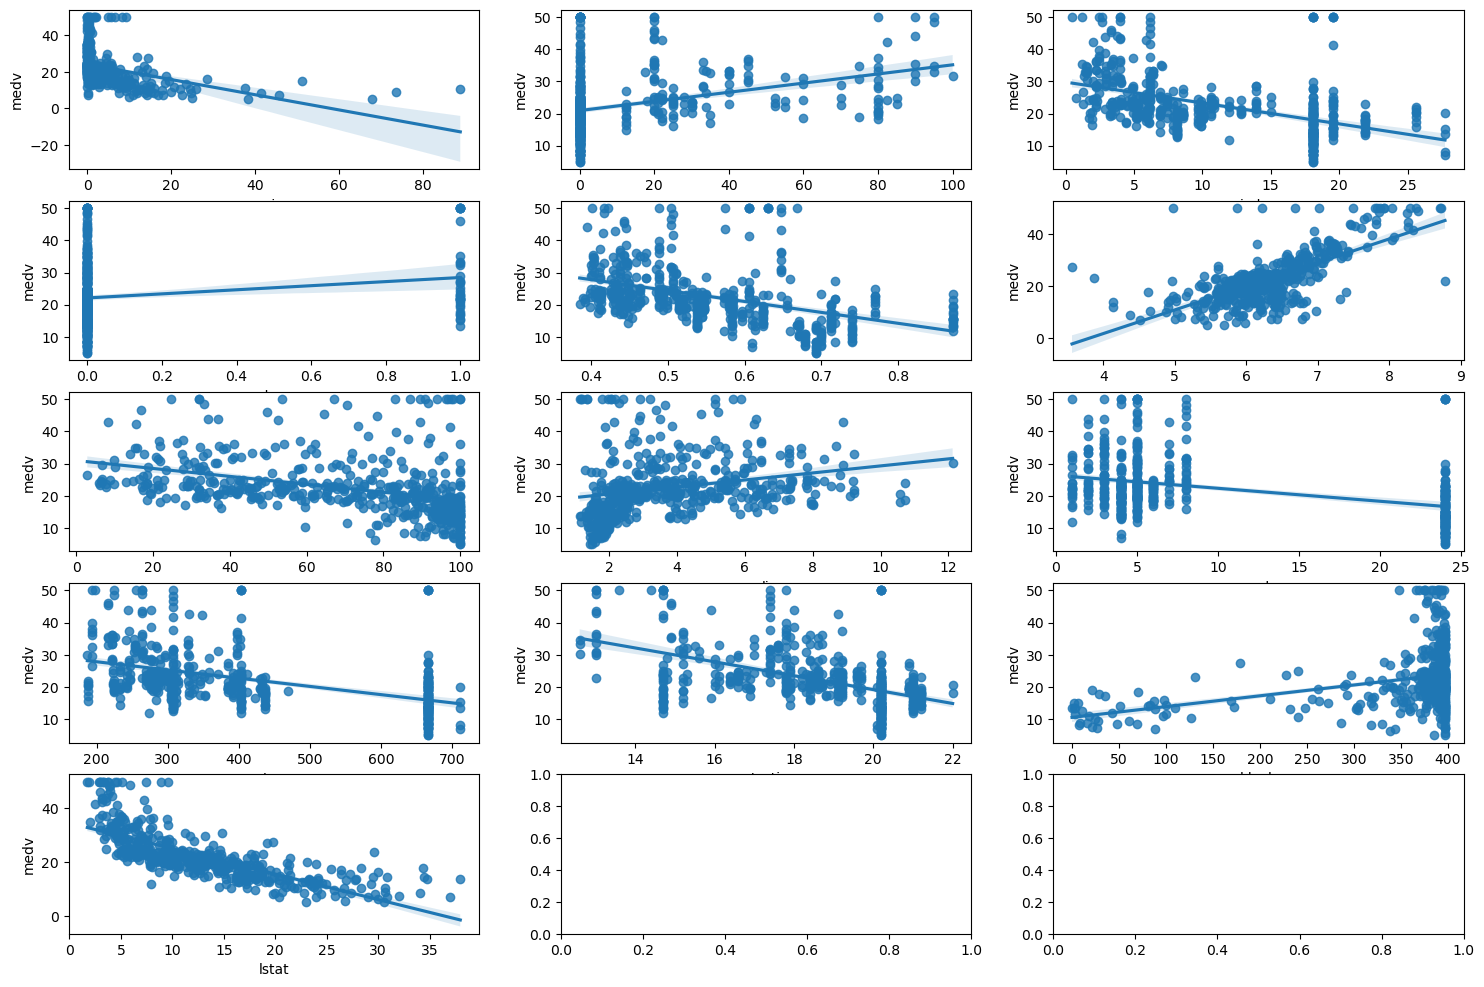

In [41]:
y = df['medv']
fig, ax = plt.subplots(round(len(df.columns)/3), 3, figsize=(18,12))
for i, ax in enumerate(fig.axes):
    if i < len(df.columns)-1:
        sns.regplot(x=df.columns[i], y='medv', data=df[df.columns], ax=ax)

In [42]:
df = df.drop('medv', axis = 1)

In [43]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.3)

In [44]:
multi_model = LinearRegression()
multi_model.fit(x_train, y_train)

LinearRegression()

In [45]:
y_pred = multi_model.predict(x_test)

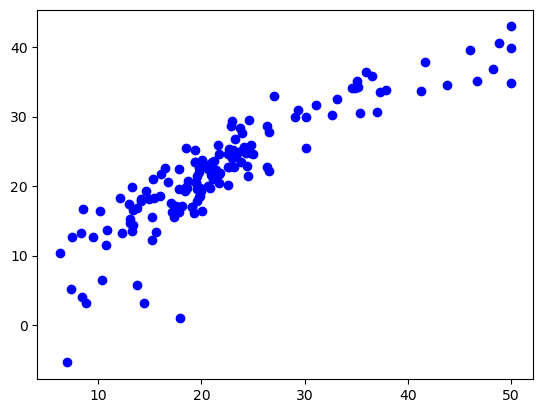

In [46]:
plt.scatter(y_test, y_pred, color="blue")

In [47]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", mse)

Mean Squared Error:  18.57168734898861


In [48]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R Squared Error: {r2}')

Mean Absolute Error: 3.0726777037675665
Mean Squared Error: 18.57168734898861
Root Mean Squared Error: 4.3094880611261255
R Squared Error: 0.7844679374650025
